# Exploration of FordGoBike Data, San Francisco, To Identify Growth Opportunies Among User Groups

## A User Group Analysis by Stefan Cornelißen

## Preliminary Wrangling

This project aims to demonstrate exploring and explanation data analysis skills. The project has been executed using a dataset from FordGoBike San Francisco area. This files contains the exploration part of the project. The explanation, that means, visualizing and presenting results is covered in a separate notebook file. At the moment of analysis, the dataset contains bike sharing rides from June 2017 till January 2019. Around 2.57 million rides are described by 16 different dimensions and measures. The dataset contains "ride-related" and anonymized data only. That means, it contains no reference to the user or user ID. Therefore, the exploration is limited to the dimensions of the ride itself, which includes the following dimensions and metrics:
<ul>
<li>Trip Duration (seconds)
<li>Start Time and Date
<li>End Time and Date
<li>Start Station ID
<li>Start Station Name
<li>Start Station Latitude
<li>Start Station Longitude
<li>End Station ID
<li>End Station Name
<li>End Station Latitude
<li>End Station Longitude
<li>Bike ID
<li>User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)
<li>Member Year of Birth
<li>Member Gender
</ul>
Source and downloads to raw data files: https://www.fordgobike.com/system-data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests
from os import makedirs
from os import listdir
from io import BytesIO
from zipfile import ZipFile

%matplotlib inline

First, I am going to download and unzip the raw data files from the source. There is one file covering all rides from 2017 and then one file per consecutive month. Then each file will be loaded into a combined dataframe to run analysis across the entire dataset.

In [5]:
#Defining a destination folder to download the raw files to
destination_folder = "fordgobike_raw_data"

In [2]:
# Download the file for 2017 separately, because it formatted as a CSV-file, which in contrast 
# to all following filles does not need to unzipped.

downloaded_response = requests.get("https://s3.amazonaws.com/fordgobike-data/2017-fordgobike-tripdata.csv")

# Storing the file to a raw-data folder
with open('fordgobike_raw_data/2017-fordgobike-tripdata.csv', 'wb') as file:
    file.write(downloaded_response.content)

In [3]:
# List of the following file_urls to be downloaded for the analysis. 
# This is not elegantly solved, but for reasons of reliability ensures reproducibility.
#All insights are limited to the period covered by the following
# files and cannot be extended to any future months without further analysis.

download_urls = ["https://s3.amazonaws.com/fordgobike-data/201801-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/fordgobike-data/201802-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/fordgobike-data/201803-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/fordgobike-data/201804-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/fordgobike-data/201805-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/fordgobike-data/201806-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/fordgobike-data/201807-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/fordgobike-data/201808-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/fordgobike-data/201809-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/fordgobike-data/201810-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/fordgobike-data/201811-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/fordgobike-data/201812-fordgobike-tripdata.csv.zip",
                 "https://s3.amazonaws.com/fordgobike-data/201901-fordgobike-tripdata.csv.zip"
                 ]

In [6]:
# Downloading, unzipping and storing the raw data files.
for url in download_urls: 
    downloaded_response = requests.get(url)
    path_file = destination_folder + url
    zipped_file = ZipFile(BytesIO(downloaded_response.content))
    zipped_file.extractall(destination_folder)
    zipped_file.close()

In [7]:
# Creating a list with all file names in the destination folder to loop through
files_raw_data_folder = []
files_raw_data_folder = listdir(destination_folder)

In [8]:
# List of the files to load into a a combined dataframe for the analysis.
files_raw_data_folder

['2017-fordgobike-tripdata.csv',
 '201801-fordgobike-tripdata.csv',
 '201802-fordgobike-tripdata.csv',
 '201803-fordgobike-tripdata.csv',
 '201804-fordgobike-tripdata.csv',
 '201805-fordgobike-tripdata.csv',
 '201806-fordgobike-tripdata.csv',
 '201807-fordgobike-tripdata.csv',
 '201808-fordgobike-tripdata.csv',
 '201809-fordgobike-tripdata.csv',
 '201810-fordgobike-tripdata.csv',
 '201811-fordgobike-tripdata.csv',
 '201812-fordgobike-tripdata.csv',
 '201901-fordgobike-tripdata.csv']

In [9]:
# Loading the files into a combined list
j = 1 #iterator

for file in files_raw_data_folder:
    if j != 1:
        # Case for the second file and onwards
        df_temp_gobike_raw = pd.read_csv(destination_folder + "/" + file)
        df_gobike_raw = df_gobike_raw.append(df_temp_gobike_raw, sort=False, ignore_index=True)
        # Skip header rows from the second file on.
        # Creating some output to check on the progress. In case the kernel shuts down due to overload
        # it is easier to find currupted files or anything.
        print("\n")
        print(file)
        print("Shape appended data frame " + str(df_temp_gobike_raw.shape))    
        print("Shape combined data frame  " + str(df_gobike_raw.shape))
    else:
        #Case for the first file.
        df_gobike_raw = pd.read_csv(destination_folder + "/" + file) # Here, including the header row.
        print(file)
        print("Shape first data frame " + str(df_gobike_raw.shape))
    j = j + 1
    
    # Uncomment the following lines in order to interrupt the loading process after a few files for
    #if j == 4:
    #break

2017-fordgobike-tripdata.csv
Shape first data frame (519700, 15)


201801-fordgobike-tripdata.csv
Shape appended data frame (94802, 16)
Shape combined data frame  (614502, 16)


201802-fordgobike-tripdata.csv
Shape appended data frame (106718, 16)
Shape combined data frame  (721220, 16)


201803-fordgobike-tripdata.csv
Shape appended data frame (111382, 16)
Shape combined data frame  (832602, 16)


201804-fordgobike-tripdata.csv
Shape appended data frame (131169, 16)
Shape combined data frame  (963771, 16)


201805-fordgobike-tripdata.csv
Shape appended data frame (179125, 16)
Shape combined data frame  (1142896, 16)


201806-fordgobike-tripdata.csv
Shape appended data frame (195968, 16)
Shape combined data frame  (1338864, 16)


201807-fordgobike-tripdata.csv
Shape appended data frame (199222, 16)
Shape combined data frame  (1538086, 16)


201808-fordgobike-tripdata.csv
Shape appended data frame (192162, 16)
Shape combined data frame  (1730248, 16)


201809-fordgobike-tripdata.csv
Sha

It appears from the column count, that the dataset for 2017 has one column less than the others. Overall, the process of appending respectively loading the contents into a combined data frame went well.

Checking, which column has been added from 2018 onwards.

In [10]:
df_2017 = pd.read_csv(destination_folder + "/" + "2017-fordgobike-tripdata.csv")
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
member_birth_year          453159 non-null float64
member_gender              453238 non-null object
dtypes: float64(5), int64(4), object(6)
memory usage: 59.5+ MB


In [11]:
df_2018_01 = pd.read_csv(destination_folder + "/" + "201801-fordgobike-tripdata.csv")
df_2018_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
duration_sec               94802 non-null int64
start_time                 94802 non-null object
end_time                   94802 non-null object
start_station_id           94802 non-null int64
start_station_name         94802 non-null object
start_station_latitude     94802 non-null float64
start_station_longitude    94802 non-null float64
end_station_id             94802 non-null int64
end_station_name           94802 non-null object
end_station_latitude       94802 non-null float64
end_station_longitude      94802 non-null float64
bike_id                    94802 non-null int64
user_type                  94802 non-null object
member_birth_year          86963 non-null float64
member_gender              87001 non-null object
bike_share_for_all_trip    94802 non-null object
dtypes: float64(5), int64(4), object(7)
memory usage: 11.6+ MB


In [12]:
df_2018_01.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


From 2018 on, the column "bike_share_for_all_trip" has been added to the raw-data files.
Furthermore, it became visible, that the columns member_birth_year and member_gender do not necessarily contain values for each row.

Quick check on the combined data set / data frame regarding the structure and the datatypes.

In [13]:
df_gobike_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2575503 entries, 0 to 2575502
Data columns (total 16 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           float64
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    int64
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
dtypes: float64(7), int64(2), object(7)
memory usage: 314.4+ MB


Most data types are correctly assigned, except start_station_ID end_station_ID and bike_id columns. Those should rather be type “string” to enhance matching quality.

In [14]:
df_gobike_raw.start_station_id = df_gobike_raw.start_station_id.astype(str)
df_gobike_raw.end_station_id = df_gobike_raw.end_station_id.astype(str)
df_gobike_raw.bike_id = df_gobike_raw.bike_id.astype(str)

Check on duplicate rows and missing values in the dataset.

In [15]:
sum(df_gobike_raw.duplicated())

0

In [16]:
for column in df_gobike_raw:
    print("Missing values in column: " + str(column))
    print(len(df_gobike_raw) - sum(df_gobike_raw[column].notnull()))

Missing values in column: duration_sec
0
Missing values in column: start_time
0
Missing values in column: end_time
0
Missing values in column: start_station_id
0
Missing values in column: start_station_name
12019
Missing values in column: start_station_latitude
0
Missing values in column: start_station_longitude
0
Missing values in column: end_station_id
0
Missing values in column: end_station_name
12019
Missing values in column: end_station_latitude
0
Missing values in column: end_station_longitude
0
Missing values in column: bike_id
0
Missing values in column: user_type
0
Missing values in column: member_birth_year
186979
Missing values in column: member_gender
186546
Missing values in column: bike_share_for_all_trip
519700


Detailed check on the missing values in the start and end columns 

In [17]:
df_missing_rows_gobike_raw = df_gobike_raw[(df_gobike_raw.start_station_name.isna()) |
                                          (df_gobike_raw.end_station_name.isna())
                                          ]

In [18]:
df_missing_rows_gobike_raw.shape

(12019, 16)

In [19]:
df_missing_rows_gobike_raw.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1916224,1649,2018-09-01 08:14:23.2840,2018-09-01 08:41:53.1630,nan,NaN,37.40,-121.94,nan,NaN,37.40,-121.94,4289,Customer,1965.0,Male,No
2092987,238,2018-10-04 09:56:30.8380,2018-10-04 10:00:29.1570,nan,NaN,37.41,-121.94,nan,NaN,37.41,-121.94,4287,Subscriber,1989.0,Male,No
1849821,1545,2018-09-12 12:55:39.7570,2018-09-12 13:21:25.2160,nan,NaN,37.39,-121.93,nan,NaN,37.39,-121.93,4126,Customer,1982.0,Male,No
1395635,887,2018-07-23 16:32:06.4240,2018-07-23 16:46:53.7050,nan,NaN,37.41,-121.96,nan,NaN,37.40,-121.94,4128,Subscriber,1990.0,Female,No
1255819,4200,2018-06-13 21:29:45.6660,2018-06-13 22:39:46.1870,nan,NaN,37.41,-121.96,nan,NaN,37.41,-121.96,4087,Customer,1997.0,Male,No
2037961,509,2018-10-12 16:39:58.1890,2018-10-12 16:48:27.4090,nan,NaN,37.41,-121.95,nan,NaN,37.42,-121.94,4126,Subscriber,2000.0,Female,Yes
1190873,84,2018-06-24 01:36:51.9840,2018-06-24 01:38:16.1840,nan,NaN,37.41,-121.94,nan,NaN,37.41,-121.94,4257,Subscriber,1991.0,Male,No
1753475,120,2018-09-27 07:26:34.8480,2018-09-27 07:28:35.7890,nan,NaN,37.41,-121.94,nan,NaN,37.41,-121.94,4130,Subscriber,1989.0,Male,No
1722726,2427,2018-08-02 06:32:13.2380,2018-08-02 07:12:41.1790,nan,NaN,37.40,-121.92,nan,NaN,37.40,-121.92,4167,Subscriber,1983.0,Female,No
2325417,270,2018-12-13 08:47:20.4190,2018-12-13 08:51:50.6080,nan,NaN,37.39,-121.93,nan,NaN,37.38,-121.94,4147,Subscriber,1994.0,Male,Yes


The missing values in the columns start_station_id, start_station_name, end_station_id and end_station_name concern exactly the same rows for all cases. This means, the values are missing simultaneously per row. I checked some sample coordinates on Google and Bing Maps and searched on https://member.fordgobike.com/map/ for a station nearby. However, in the sample cases there are no stations nearby. As also the station names are missing on both start and end points, there must be another explanation. A quick search on the FordGoBike site and Google News revealed, that FordGoBike introduced dock less renting mid-2018, for dedicated bikes in a dedicated, smaller area of "North San Jose". Refer to: https://www.mercurynews.com/2018/06/14/ford-gobike-launches-dockless-program-in-north-san-jose/
https://www.fordgobike.com/nsj
https://d21xlh2maitm24.cloudfront.net/fgb/NSJ-service-area-map.png?mtime=20180531110105  

The dates of start and end time corresponded well with the moment of introduction within the manual sample. Those rows with missing start stations shall therefore be kept in mind.

Missing values in the columns member_birth_year and member_gender may be explained by their non-compulsory characteristic during the registration process. They will be left as they are. I prefer to limit validity of any age or gender analysis accordingly, instead of excluding them from the beginning on. The same goes for the column bike_share_for_all_trip which is missing in all 2017 data.

**The dataset can now be regarded as ready for the exploration phase.**

The combined data set shall first be saved to a CSV-file in order to spare re-downloading and appending the files in case of failures.

In [20]:
df_gobike_raw.to_csv("fordgobike_combined_2017-06-28_to_2019-01-31.csv", header=True, index=False)

### What is the structure of your dataset?

The data set has around 2.57 million entries restively rows and 16 columns in total. Each row represents a bike ride / rental in the period of (end) June 2017 till January 2019. The dataset contains numerical and categorical data at the same time. Station names, the user type (subscriber or casual user), gender belong to the categorical type. To numerical data belongs the user’s year of birth and the trips duration, which is also implied by the moments start and end data-time-stamps. Furthermore, the start and end stations coordinates are also included as numeric latitude and longitude columns. In addition, bikes and stations are indicated by unique IDs.

The value presence across the single columns is fragmented. The variable bike_share_for_all_trip has been introduced in January 2018. Furthermore, not all users have provided their year of birth or checked the value "Other" value for gender. Lastly FordGoBike introduced mid 2018 dock less bike renting as an additional service to the common station oriented renting. All of these fragmentations need to be taken into account, during the exploration phase.

### What is/are the main feature(s) of interest in your dataset?

I am most interested to look at the usage in terms of the number of overall rides, duration and duration per ride. I want to explore what segment of user (divided by user type, gender and age) is using the FordGoBike service most and least. This exploration shall provide guidance for potential growth / business opportunities.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The amount of rides, the metric duration and the dimension’s user type, gender and birth year will the features of most interest.

Note: I create a copy of the data frame prior to exploration, to separate wrangling from exploration.

In [21]:
df_gobike = df_gobike_raw.copy()

## Univariate Exploration

I will start by looking at the distribution of the user types "customer and subscriber".

In [22]:
#Setting some default parameters for visualization.
sb.set_style('whitegrid')
default_color = sb.color_palette()[0]

In [24]:
(df_gobike.user_type.value_counts(sort=True, normalize=True)*100)

Subscriber    83.925975
Customer      16.074025
Name: user_type, dtype: float64

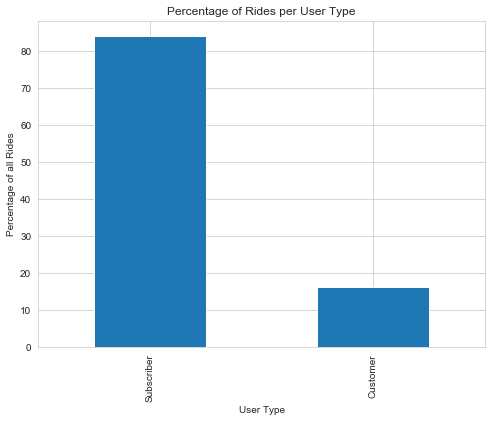

In [25]:
plt.figure(figsize=[8, 6])
(df_gobike.user_type.value_counts(sort=True, normalize=True)*100).plot.bar(color = default_color)
plt.title("Percentage of Rides per User Type")
plt.ylabel("Percentage of all Rides")
plt.xlabel("User Type");

The majority of rides has been done by users of the type subscribers. The subscription is payed either monthly or yearly with discount.
Refer to: https://www.fordgobike.com/pricing
<li>Customer: first 30min for 2 USD, every additional 15min for 3 USD or day /3 day pass.</li>
<li>Subcriber: 15 USD per month or 149 USD per year - unlimited 45min periods - every additional 15min for 3 USD.</li>

Next am I am going to look at the distribution of the variable "gender".

In [27]:
(df_gobike.member_gender.value_counts(sort=True, normalize=True)*100)

Male      74.161234
Female    24.292777
Other      1.545988
Name: member_gender, dtype: float64

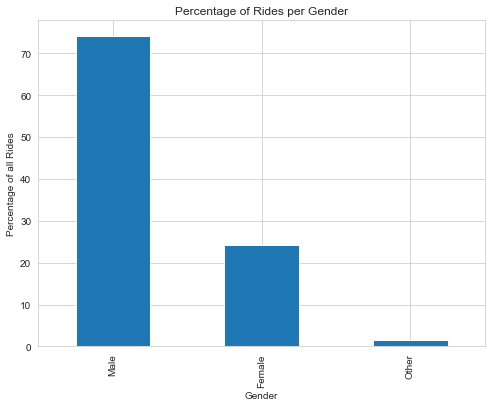

In [26]:
plt.figure(figsize=[8, 6])
(df_gobike.member_gender.value_counts(sort=True, normalize=True)*100).plot.bar(color = default_color);
plt.title("Percentage of Rides per Gender")
plt.ylabel("Percentage of all Rides")
plt.xlabel("Gender");

The majority of rides has been done by male users. Very few indicated their gender by the value "Other".

Next I want to explore the age distribution. To plot the distribution of the column member_birth_year, it is useful to first calculate the age.

In [28]:
df_gobike['member_age'] = 2019 - df_gobike.member_birth_year

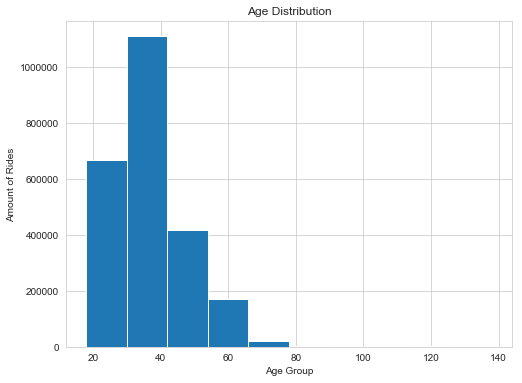

In [29]:
plt.figure(figsize=[8, 6])
df_gobike.member_age.hist(color = default_color)
plt.title("Age Distribution")
plt.ylabel("Amount of Rides")
plt.xlabel("Age Group");

It makes sense, to reduce the bin size, to get more detail, especially for higher ages.

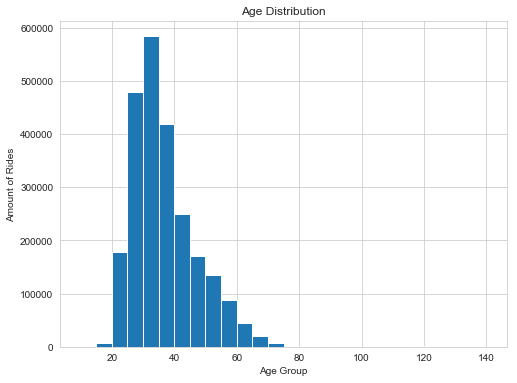

In [30]:
binsize = 5
bins = np.arange(10, df_gobike.member_age.max()+binsize, binsize)
plt.figure(figsize=[8, 6])
plt.hist(data=df_gobike, x='member_age', bins = bins, color = default_color)
plt.title("Age Distribution")
plt.ylabel("Amount of Rides")
plt.xlabel("Age Group");

Since this plot does not reveal any potential outliers due to the fitted scale for the high amount of users aged around 30, I shall add a box plot to gain more insight.

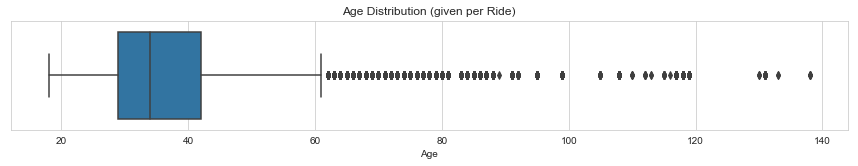

In [31]:
plt.figure(figsize=(15,2))
sb.boxplot(x='member_age', data = df_gobike, color = default_color);
plt.title("Age Distribution (given per Ride)")
plt.xlabel("Age");

The boxplot shows, like the histogram before, that the majority of ages around 30. Unlike the histogram, the boxplot reveals outliers, which need to be investigated. The outliers between 60 and 100 years seem reasonable. To use this service one needs to know how to operate with apps and needs to understand that the service is based on internet connectivity. Apart to the physical ability to ride bikes, this setting naturally induces these outliers. However, people aging above hundred years seem odd. I therefore want to go into detail.

In [32]:
#Separating entries with invalid ages, to set those to 0
df_gobike_outliers_age_100 = df_gobike[(df_gobike.member_age > 100)]

In [33]:
# Getting an overview of those unnatural outliers.
df_gobike_outliers_age_100.member_age.value_counts()

119.0    840
117.0    398
108.0    274
118.0     42
131.0     23
105.0     18
115.0     12
112.0      7
138.0      5
110.0      4
130.0      3
113.0      2
133.0      2
116.0      1
Name: member_age, dtype: int64

In [34]:
# How many outliers are existent?
len(df_gobike_outliers_age_100)

1631

Many people seem to have checked the birth year 1900 or earlier (which makes me think, that this might have been a default value in the registration process). It appears, these users did not want to provide their birth year from some reason or just missed it. I therefore shall insert 0 in the according rows. This solution does not compromise data quality too much in comparison to delete those rows instead.

In [35]:
#Separating entries with valid ages, by filtering user with age above 100.
df_go_bike_temp = df_gobike[(df_gobike.member_age <= 100)] 

In [36]:
df_go_bike_temp.shape

(2386893, 17)

In [37]:
# Check to ensure correct handling.
len(df_gobike) == len(df_gobike_outliers_age_100) + len(df_go_bike_temp) + 186979 
# 186.979 is the amount where there is NaN-values in the column member_birth_year.
# If True, the all entries in the dataset are taken into account.

True

In [38]:
# Setting columns member_birth_year and member_age to 0 for those with invalid ages.

df_gobike_outliers_age_100.member_birth_year = 0
df_gobike_outliers_age_100.member_age = 0

df_gobike_outliers_age_100.sample(3) # Check on the result.

C:\Users\scorneli\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
795361,706,2018-03-12 07:44:44.4740,2018-03-12 07:56:31.2950,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,58.0,Market St at 10th St,37.776619,-122.417385,2947,Customer,0,Female,No,0
660186,712,2018-02-15 12:45:26.9700,2018-02-15 12:57:19.3720,173.0,Shattuck Ave at 55th Ave,37.840364,-122.264488,148.0,Horton St at 40th St,37.829705,-122.287610,92,Subscriber,0,Male,Yes,0
1140904,1526,2018-05-01 09:29:56.1040,2018-05-01 09:55:22.2580,145.0,29th St at Church St,37.743684,-122.426806,49.0,S Park St at 3rd St,37.780760,-122.394989,3555,Subscriber,0,Other,No,0


In [39]:
#Appending the dataframes, into a new dataframe, one with the corrected values for age and birth year.
df_go_bike_temp = df_go_bike_temp.append(df_gobike_outliers_age_100, sort=False, ignore_index=True)

In [40]:
# Now appending the rows without provided birth year to the dataset in order to restore the orignal amount of entries. 
df_go_bike_temp_birth_nan = df_gobike[(df_gobike.member_birth_year.isna())]
df_go_bike_temp_birth_nan.member_birth_year = 0
df_go_bike_temp_birth_nan.member_age = 0

In [41]:
df_go_bike_temp_birth_nan.sample(3) # Check if everything went well? Yes.

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
2033519,2765,2018-10-13 13:05:21.1010,2018-10-13 13:51:26.8550,16.0,Steuart St at Market St,37.794130,-122.394430,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,3001,Customer,0,NaN,No,0
1066731,328,2018-05-14 09:26:59.4190,2018-05-14 09:32:27.9140,89.0,Division St at Potrero Ave,37.769218,-122.407646,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,1397,Subscriber,0,NaN,No,0
2130391,641,2018-11-28 14:37:41.7690,2018-11-28 14:48:23.3750,119.0,18th St at Noe St,37.761047,-122.432642,125.0,20th St at Bryant St,37.759200,-122.409851,1537,Customer,0,NaN,No,0


In [42]:
df_go_bike_temp = df_go_bike_temp.append(df_go_bike_temp_birth_nan, sort=False, ignore_index=True)

In [43]:
# Checking if the total amount of entries is restored to its original amount of 2.575.503 .
print(len(df_go_bike_temp) == len(df_gobike))
print(len(df_gobike))

True
2575503


In [44]:
# Checking if datatypes are still correct after the appending action?
df_go_bike_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2575503 entries, 0 to 2575502
Data columns (total 17 columns):
duration_sec               int64
start_time                 object
end_time                   object
start_station_id           object
start_station_name         object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             object
end_station_name           object
end_station_latitude       float64
end_station_longitude      float64
bike_id                    object
user_type                  object
member_birth_year          float64
member_gender              object
bike_share_for_all_trip    object
member_age                 float64
dtypes: float64(6), int64(1), object(10)
memory usage: 334.0+ MB


In [45]:
# The types for member_birth_year and member_age need to be converted back to type integer.
df_go_bike_temp.member_birth_year = df_go_bike_temp.member_birth_year.astype(int)
df_go_bike_temp.member_age = df_go_bike_temp.member_age.astype(int)

In [46]:
#Copying the corrected data frame to a new version for further analysis
df_gobike_v2 = df_go_bike_temp.copy()

Now, that the values for age (and birth year) have been corrected to 0, as well as the NaNs, I want to segment the age values to into age groups, also to make further bivariate or multivariate analysis more readable. Segments of ten years should work. Starting at 15 to 24 years, 25 to 34 years, etc. should be sufficient. Furthermore, in the online marketing industry, these segments can often be used in campaign targeting settings. So potential insights can directly be translated to dedicated campaigns. 

In [47]:
df_gobike_v2['age_group'] = pd.cut(df_gobike_v2.member_age, [0,24,34,44,54,64,74,84,94,100], labels =['15-24', '25-34',
                                                                                        '35-44', '45-54',
                                                                                       '55-64', '65-74',
                                                                                        '75-84', '85-94',
                                                                                        '95-100'                      
                                                                                       ])

In [48]:
df_gobike_v2.sample(50) # Check if cutting went well? Yes.

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,age_group
485890,573,2018-01-22 13:50:14.8330,2018-01-22 13:59:48.3970,183.0,Telegraph Ave at 19th St,37.808702,-122.269927,193.0,Grand Ave at Santa Clara Ave,37.812744,-122.247215,3440,Subscriber,1956,Male,No,63,55-64
1223127,742,2018-07-30 13:58:41.2880,2018-07-30 14:11:03.5630,175.0,49th St at Telegraph Ave,37.835946,-122.262366,167.0,College Ave at Harwood Ave,37.848152,-122.252160,418,Subscriber,1953,Female,No,66,65-74
1248479,269,2018-07-25 19:49:58.9870,2018-07-25 19:54:28.8090,66.0,3rd St at Townsend St,37.778742,-122.392741,47.0,4th St at Harrison St,37.780955,-122.399749,1150,Subscriber,1983,Male,No,36,35-44
2252849,290,2019-01-25 16:55:16.2680,2019-01-25 17:00:06.6030,47.0,4th St at Harrison St,37.780955,-122.399749,81.0,Berry St at 4th St,37.775880,-122.393170,4802,Subscriber,1968,Male,No,51,45-54
45712,778,2017-12-11 13:23:49.1410,2017-12-11 13:36:48.0100,97.0,14th St at Mission St,37.768265,-122.420110,36.0,Folsom St at 3rd St,37.783830,-122.398870,458,Subscriber,1990,Male,NaN,29,25-34
834466,762,2018-04-09 08:25:10.5720,2018-04-09 08:37:53.5180,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,1817,Subscriber,1978,Male,No,41,35-44
948844,515,2018-05-15 18:17:21.4160,2018-05-15 18:25:57.1070,49.0,S Park St at 3rd St,37.780760,-122.394989,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,1665,Subscriber,1980,Male,No,39,35-44
517754,351,2018-01-10 21:15:44.8730,2018-01-10 21:21:36.4830,266.0,Parker St at Fulton St,37.862464,-122.264791,245.0,Downtown Berkeley BART,37.870348,-122.267764,3410,Subscriber,1994,Female,No,25,25-34
170920,478,2017-10-30 08:57:34.0190,2017-10-30 09:05:32.2020,27.0,Beale St at Harrison St,37.788059,-122.391865,49.0,S Park St at 3rd St,37.780760,-122.394989,3008,Subscriber,1987,Female,NaN,32,25-34
795860,416,2018-04-18 17:05:49.4480,2018-04-18 17:12:46.1870,27.0,Beale St at Harrison St,37.788059,-122.391865,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,267,Subscriber,1975,Male,No,44,35-44


Now, the grouped ages can be plotted into a bar chart.

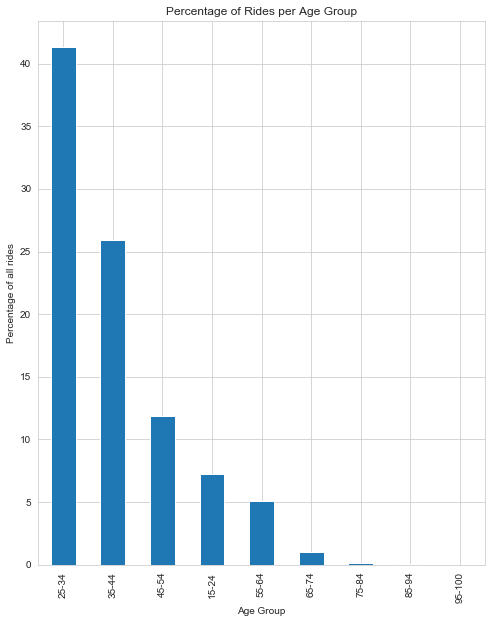

In [49]:
plt.figure(figsize=[8, 10]) # Highering the y-scale ensures, that smaller bars stay visible.
(df_gobike_v2.age_group.value_counts()/len(df_gobike_v2)*100).plot.bar(color = default_color);
plt.title("Percentage of Rides per Age Group")
plt.ylabel('Percentage of all rides')
plt.xlabel('Age Group');

In [42]:
print(str(round(sum(df_gobike_v2.age_group.value_counts() )/ len(df_gobike_v2) * 100)) + 
      "% of all rides where provided with the users birth year.")

93% of all rides where provided with the users birth year.


This graph shows the age distribution among all rides in the period of observation. Note, this graph only accounts for 93% of all rides. 7% of the rides where done by users without their year of birth given.

The graph shows, that users between 25 and 34 made up for more than 40% of all rides. Users between 35 and 44 account for the second biggest user group.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The first visualizations reveal that the majority of the rides (84%) were done by users of the subscriber type. Male users account for the most rides (74%), whereas female users account for 24%. Most users are between 25 and 34 years old. The second biggest group ages between 35 and 44 years. Unusual at this point are some users with ages far above 100 years. 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The dataset contained outliers in the column birth year which needed to be addressed by filtering them out. In addition, this same column contained "NaN" values. The other two of three dimensions did not contain any unusual points. After addressing the outlier issue, these three variables may well serve as separation segments in the bivariate and multivariate exploration later on.

Since the year of birth was not suitable for visualization, I decided to go for the age instead. The age appeared more intuitive to me. So adding and calculating this column has been necessary. In addition, I took a closer look at the values of the column member_age (derived from member_birth_year by sustracting "2019") and decided to set every value above 100 years to 0. I did the same for the NaN values. Up until around 100 years, it could theoretically be the truth, however everything above is most certainly not the truth. Note: I prefer to remove outliers in age by human logic instead of statistical logic. The statistics would have cut off rides of users older than approximately 60 years. However, this would be too drastic in human terms, where people can be perfectly capable of riding a bike even when being 95 years old. I also preferred setting outliers to 0 instead of excluding these rows, to not reduce too much on data validity for analysis which is in depended on the age.

To ease the viewability of the visualizations I decided to assign the given age of each ride to its according age group. I decided for the following split, according to the prior mentioned marketing standards: 15 to 24 years, 25 to 34 years, etc. till 95 to 100 year.


## Bivariate Exploration

Next I am going to analyze which user group, segmented by age and gender uses the FordGoBike service most. This serves as a preliminary information to elaborate the amount of rides, the duration and the duration per ride and user group later on.

In [50]:
df_gobike_v2.member_gender.value_counts()

Male      1771680
Female     580344
Other       36933
Name: member_gender, dtype: int64

For reasons of relevance, I continue the exploration with data of users which indicated their gender by female or male. The first step is to look at the distribution of gender per age group.

In [51]:
df_gobike_v2_male = df_gobike_v2[(df_gobike_v2.member_gender == "Male")]
df_gobike_v2_female = df_gobike_v2[(df_gobike_v2.member_gender == "Female")]

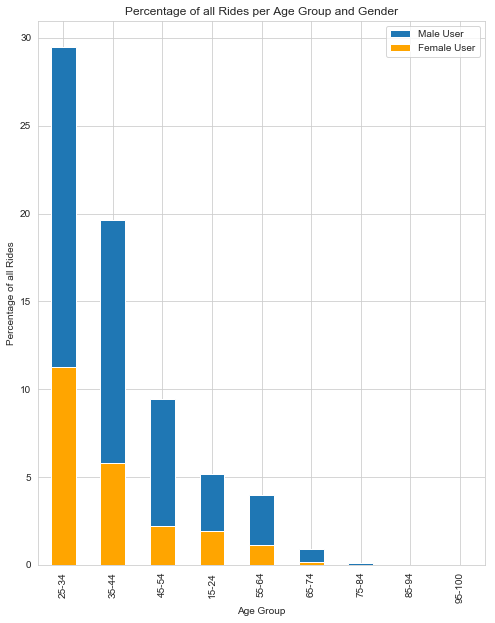

In [53]:
plt.figure(figsize=[8, 10]) #Highering the y-scale ensures, that smaller bar stay visible.
(df_gobike_v2_male.age_group.value_counts() / len(df_gobike_v2)*100).plot.bar(color = default_color, label='Male User');
(df_gobike_v2_female.age_group.value_counts() / len(df_gobike_v2)*100).plot.bar(color = 'orange', label='Female User');
plt.legend(loc='upper right')
plt.title("Percentage of all Rides per Age Group and Gender")
plt.ylabel('Percentage of all Rides')
plt.xlabel('Age Group');

This graph shows how the rides are proportioned across the age groups. By far, most rides were done by male users between 25 and 34 years.

Next, I am going to take a different perspective on the distribution of gender and their respective amount of rides.

In [54]:
# Separate rides without a given year of birth / age + consideration of the gender male and female only.
df_gobike_without_age_nan = df_gobike_v2[(df_gobike_v2.member_age.notnull()) &
                                          ((df_gobike_v2.member_gender == "Male") |
                                           (df_gobike_v2.member_gender == "Female")
                                          )]

In [55]:
df_gobike_without_age_nan.sample(50) #Check if filtering went well. Yes.

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,age_group
1538745,200,2018-08-08 08:32:42.7010,2018-08-08 08:36:02.8050,186.0,Lakeside Dr at 14th St,37.801319,-122.262642,163.0,Lake Merritt BART Station,37.797320,-122.265320,2588,Subscriber,1980,Female,No,39,35-44
316768,1110,2017-09-12 10:54:07.4980,2017-09-12 11:12:37.9100,102.0,Irwin St at 8th St,37.766883,-122.399579,37.0,2nd St at Folsom St,37.785000,-122.395936,2540,Subscriber,1995,Male,NaN,24,15-24
188605,234,2017-10-24 16:37:26.3670,2017-10-24 16:41:21.0320,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,403,Subscriber,1977,Male,NaN,42,35-44
1175684,344,2018-06-07 08:11:26.1740,2018-06-07 08:17:11.1670,178.0,Broadway at 30th St,37.819381,-122.261928,182.0,19th Street BART Station,37.809013,-122.268247,2208,Subscriber,1986,Female,No,33,25-34
2255355,722,2019-01-25 10:31:54.6130,2019-01-25 10:43:57.2100,77.0,11th St at Natoma St,37.773507,-122.416040,49.0,S Park St at 3rd St,37.780760,-122.394989,5359,Subscriber,1995,Male,No,24,15-24
1538789,586,2018-08-08 08:23:08.3010,2018-08-08 08:32:54.9010,91.0,Berry St at King St,37.771762,-122.398438,37.0,2nd St at Folsom St,37.785000,-122.395936,535,Subscriber,1989,Male,No,30,25-34
2256300,180,2019-01-25 09:10:05.4020,2019-01-25 09:13:05.8390,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,873,Subscriber,1990,Male,No,29,25-34
1090938,582,2018-06-21 09:23:31.1040,2018-06-21 09:33:14.0850,81.0,Berry St at 4th St,37.775880,-122.393170,19.0,Post St at Kearny St,37.788975,-122.403452,2028,Subscriber,1969,Female,No,50,45-54
805469,385,2018-04-16 17:03:56.0200,2018-04-16 17:10:21.7340,182.0,19th Street BART Station,37.809013,-122.268247,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,3505,Subscriber,1987,Male,No,32,25-34
1473568,612,2018-08-19 14:49:56.7950,2018-08-19 15:00:09.3310,70.0,Central Ave at Fell St,37.773311,-122.444293,70.0,Central Ave at Fell St,37.773311,-122.444293,2517,Customer,1969,Female,No,50,45-54


In [269]:
df_gobike_without_age_nan.shape

(2352024, 18)

The last bar plot did its job well, however, I would like to check if a violin plot can reveal more detailed information.

C:\Users\scorneli\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


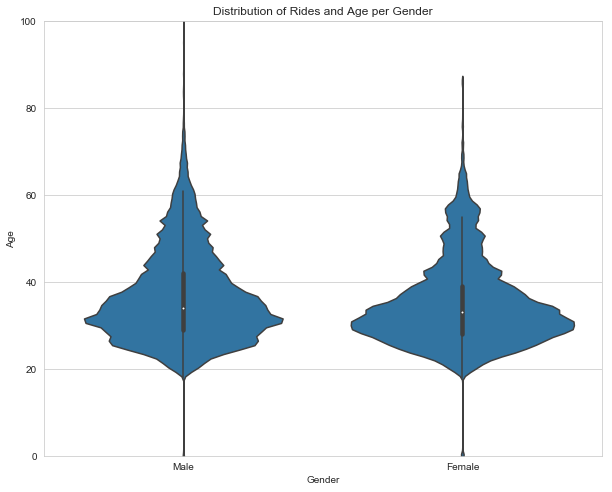

In [56]:
plt.figure(figsize=[10, 8])
sb.violinplot(data = df_gobike_without_age_nan, x = 'member_gender', y = 'member_age', color = default_color)
plt.title("Distribution of Rides and Age per Gender")
plt.ylabel("Age")
plt.xlabel("Gender")
plt.ylim([0,100]);

These violin plots make three things more visible compared to the previous bar plot. First, it shows more clearly, that within the group of rides done by male users, the age distribution a bit more stretched towards higher ages. Second, it shows the relative frequency of rides across both groups (male / female). Thereby it reveals on first sight, that the group of female users is denser around users aging around 30 years (indicated by the width of the "violin"). Third, the interquartile distance (indicated by the thicker line in the middle of each violin) is shorter for the group of female users, which also tells us, that the age distribution is denser.

To visualize the usage, i.e. the amount and duration the dataset needs to be segmented by the membership models.

In [58]:
df_gobike_customer = df_gobike_v2[(df_gobike_v2.user_type == "Customer")]
df_gobike_subscriber = df_gobike_v2[(df_gobike_v2.user_type == "Subscriber")]

In [59]:
# Converting seconds to minutes in an additional column, to make plots more readable.
df_gobike_customer['duration_min'] = df_gobike_customer.duration_sec/60 
df_gobike_subscriber['duration_min'] = df_gobike_subscriber.duration_sec/60

C:\Users\scorneli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\scorneli\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [60]:
# Check if the separation went well. Yes.
len(df_gobike_subscriber) + len(df_gobike_customer) == len(df_gobike_v2)

True

Next, I am going to explore how the length of the rides is distributed across the membership models as a preparation to segment those by age group and gender.

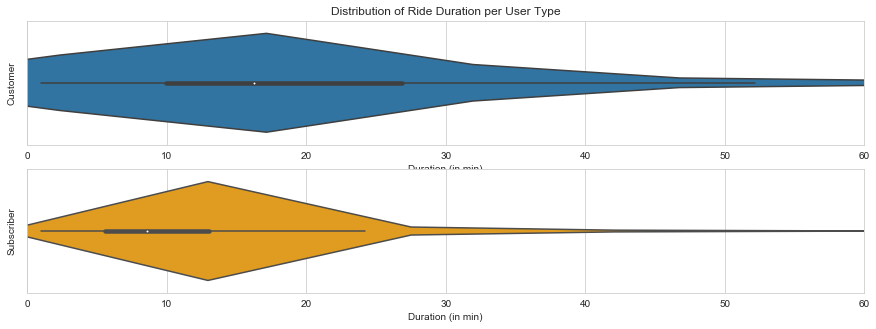

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(2, 1, 1)
sb.violinplot(x='duration_min', data = df_gobike_customer, color = default_color, label ="Customer")
plt.title("Distribution of Ride Duration per User Type")
plt.xlabel("Duration (in min)")
plt.ylabel("Customer")
plt.xlim(0,60);

plt.subplot(2, 1, 2)
sb.violinplot(x='duration_min', data = df_gobike_subscriber, color = 'orange', label ="Subscriber")   
plt.xlabel("Duration (in min)")
plt.ylabel("Subscriber")
plt.xlim(0,60);

These plots show the relative distribution of the duration of trips for the group of subscribers and customers. Noteworthy is, that customers have longer enduring trips/rides than the group of subscribers. The plot also gives a hint, that we have to deal with outliers in this variable.

Next, I shall exclude the outliers in duration from further analysis to generate meaningful insights, valid for the majority of rides. But first, I am going to check at which duration it would make sense to exclude data.

From now on, I want to focus the exploration on the group of subscribers only.


In [62]:
# From the prior violin plot it became clear, that I have to look especially at last quartile of rides.
df_gobike_subscriber.duration_sec.describe(percentiles = [0.05, 0.10, 0.25, 0.5, 0.75, 0.9, 0.95, 0.995, 0.998, 0.999])/60

count    36025.266667
mean        11.236679
std         24.298027
min          1.016667
5%           2.883333
10%          3.683333
25%          5.550000
50%          8.616667
75%         13.033333
90%         18.766667
95%         23.666667
99.5%       60.316667
99.8%      125.566667
99.9%      248.366167
max       1438.016667
Name: duration_sec, dtype: float64

This description of the percentiles shows, that 99.9% of the rides do not take more than 248.37 minutes, which equals approximately 4 hours and 8 minutes. For further exploration it makes sense to include as much values as possible to make the analysis on aspects of duration and usage as complete as possible. This handling ensures, that only an absolute minimum of data points is excluded, whereas this plot on its own, would have suggested to remove more outlying values. 

Note: To me, 4 hours still seem to be a reasonable trip duration, which might occur from time to time. From a business logic, it makes sense to include those in the analysis, because the happen to be the truth. In addition, the plot shows that only very few trips endure more than 40 minutes. Trips longer than 4 hours may be reasoned by technical issues. The bike might not have been locked properly. 

Next, I will exclude rides which took more than 4 hours (14.400 seconds) from the segment of subscribers before continuing with the multivariate exploration.

In [63]:
df_gobike_subscriber_without_outliers = df_gobike_subscriber[(df_gobike_subscriber.duration_sec <= 14400)]

In [64]:
print("This action removed " + str(len(df_gobike_subscriber) - len(df_gobike_subscriber_without_outliers)) +
      " outlying rides from the segment of subscribers.")

This action removed 2248 outlying rides from the segment of subscribers.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

In addition to the fact that female users used the service far less than male users, this part also revealed that female users are generally younger than male users. The relative distribution of age, segmented by gender shows, that the values for age are denser distributed than for males.  

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Regarding the duration of rides, it became visible that subscribers have shorter trips than regular customers. Important at this point, is to handle the outlying values. Although there were very few outlying values, they might cause inaccurate evaluations, as their values (duration) were multiples from the average.


## Multivariate Exploration

Next I want to explore, how the amount of rides and the duration differs among subscribers for each combination/segment of gender and age group.

In [65]:
# Removing "Other" values from the column member_gender. This group of users is too insignificant compared to the 
# groups of male or female users. So excluding the group of "Other" will enhance readibility in the visualization.
df_gobike_subscriber_female_male_without_outliers = df_gobike_subscriber_without_outliers[
    (df_gobike_subscriber_without_outliers.member_gender != "Other")]

In [66]:
df_gobike_subscriber_female_male_without_outliers.member_gender.value_counts() # Check

Male      1590680
Female     495870
Name: member_gender, dtype: int64

In order to visualize amount of rides and duration segmented by age group and gender, I need to pivot these settings first.

In [67]:
ct_rides_subsriber = df_gobike_subscriber_female_male_without_outliers.groupby(['member_gender', 'age_group']).size()
ct_rides_subsriber = ct_rides_subsriber.reset_index(name = 'count')
ct_rides_subsriber = ct_rides_subsriber.pivot(index = 'age_group', columns = 'member_gender', values = 'count')

In [68]:
ct_duration_subsriber = df_gobike_subscriber_female_male_without_outliers.groupby(['member_gender', 'age_group'])['duration_sec'].agg('sum')
ct_duration_subsriber = ct_duration_subsriber
ct_duration_subsriber = ct_duration_subsriber.reset_index(name = 'duration_min')
ct_duration_subsriber = ct_duration_subsriber.pivot(index = 'age_group', columns = 'member_gender', values = 'duration_min')

In [78]:
# Check, if the pivoting actions went well?
ct_rides_subsriber

member_gender,Female,Male
age_group,,
15-24,37736.0,113227.0
25-34,245187.0,674382.0
35-44,131627.0,458351.0
45-54,50726.0,223511.0
55-64,26093.0,94967.0
65-74,3106.0,22517.0
75-84,353.0,2204.0
85-94,287.0,418.0
95-100,NaN,281.0


In [79]:
ct_duration_subsriber

member_gender,Female,Male
age_group,,
15-24,26264884.0,67685587.0
25-34,172109719.0,407362716.0
35-44,89622449.0,273254405.0
45-54,36723990.0,143641540.0
55-64,21679132.0,65783047.0
65-74,2676757.0,14863738.0
75-84,241312.0,1624436.0
85-94,175045.0,205843.0
95-100,NaN,186303.0


In [80]:
# Using those two pivot tables to calculate the average per ride on each segment.
ct_duration_per_ride_subscriber = ct_duration_subsriber / ct_rides_subsriber
ct_duration_per_ride_subscriber

member_gender,Female,Male
age_group,,
15-24,696.016642,597.786632
25-34,701.952873,604.053364
35-44,680.881954,596.168450
45-54,723.967788,642.659824
55-64,830.840915,692.693746
65-74,861.801996,660.111827
75-84,683.603399,737.039927
85-94,609.912892,492.447368
95-100,NaN,663.000000


Now, that the data is pivoted per age group and gender, I want to use heatmaps, where the colorization indicates differences in the amount of rides, the duration and the duration per ride, segmented by age group and gender, across the group of subscribers.

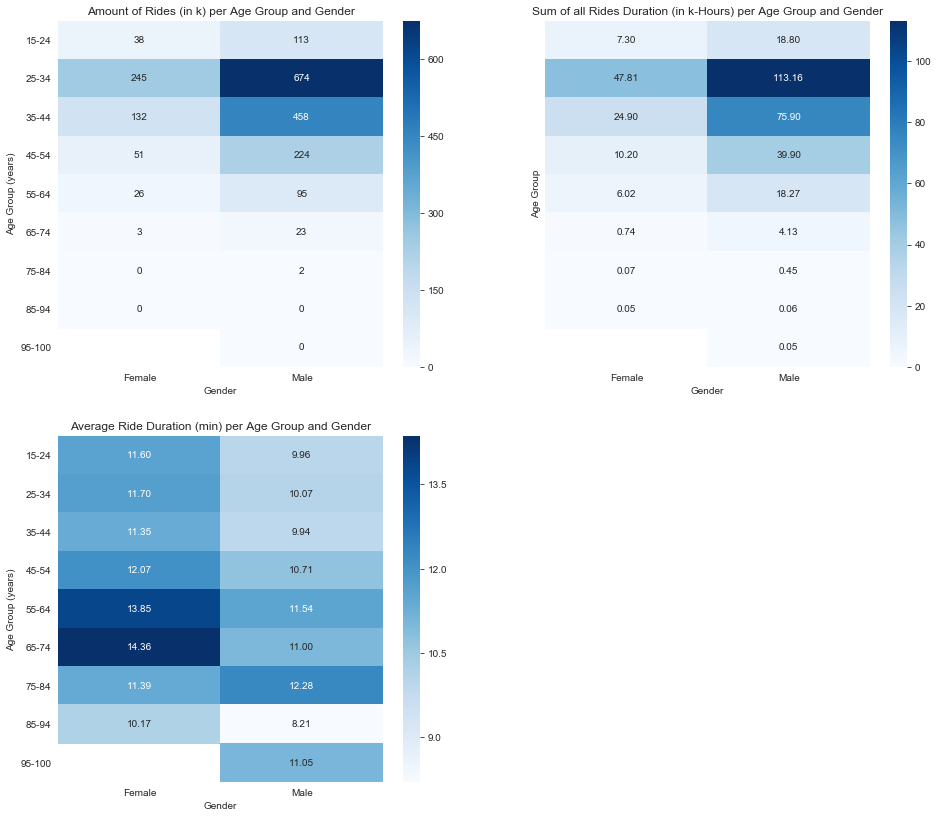

In [81]:
plt.figure(figsize = [16, 14])

plt.subplot(2, 2, 1)
sb.heatmap(ct_rides_subsriber/1000, annot = True, fmt =  '.0f',  cmap = 'Blues')
plt.title("Amount of Rides (in k) per Age Group and Gender")
plt.ylabel("Age Group (years)")
plt.xlabel("Gender")
plt.yticks(rotation=360)

plt.subplot(2, 2, 2)
sb.heatmap(ct_duration_subsriber/60/60/1000, annot = True, fmt =  '.2f',  cmap = 'Blues', yticklabels=False)
plt.title("Sum of all Rides Duration (in k-Hours) per Age Group and Gender")
plt.ylabel("Age Group")
plt.xlabel("Gender")

plt.subplot(2, 2, 3)
sb.heatmap(ct_duration_per_ride_subscriber/60, annot = True, fmt =  '.2f',  cmap = 'Blues');
plt.title("Average Ride Duration (min) per Age Group and Gender")
plt.ylabel("Age Group (years)")
plt.xlabel("Gender")
plt.yticks(rotation=360);

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In this part, I observed that the usage in terms of amount of rides and the duration do not diverge much among the segments of age group and gender. That means, the group with most rides also has the highest total ride duration. The same goes for the other segments. This can easily be identified by the colorization of the first two heatmaps. The highest usage is achieved by male users between 25 and 34 years. The second highest by males between 35 and 44 years. 
The colorization hue is identical per sub-segment in both heatmaps. Thinking the other way around it means, there is no segment which uses the service in such a degree that it would drive over proportional usage, which could mean that it blocks important bike-capacities for other groups.

The first two heatmaps also show, which sub segments are using FordGoBike extensively and which are not. The darker the colorization, the more important the segment is, in terms of usage. Using these heatmaps, one can easily identify which segment can be marketed on. The lighter the colorization, the higher the unused potential for FordGoBike can be. Given that the segments population in San Francisco high big enough. Hence, it could make sense for FordGoBike to get more woman using the service by either putting marketing efforts into it, or by making the corporate identity more appealing to woman. Next, the group of 45 to 54-year-old people could become an asset when targeting those dedicatedly with marketing activities. This group does not use the bikes as much as the younger groups, but could still be very capable of riding bicycles. 

### Were there any interesting or surprising interactions between features?
The third heatmap shows interesting differentiations among the user segments. The duration per trip (in the group of subscribers, outliers excluded) shows that woman tend to have little longer enduring rides than man. Furthermore, rides of older users tend to endure longer than rides of younger users. However, since both female and older users represent rather smaller user groups, they do not increase the total trip duration to such a degree, that it would affect the colorization of the second heatmap.


## Summary und Conclusion

The here analyzed dataset from FordGoBike (San Francisco) is based on the ride data from 28th of June 2017 till 31st of January 2019. This period is also the period of observation. The dataset has been explored by segmenting the data using the variables of user type (subscriber or regular customer), gender, age and by quantitate variables such as amount of rides and their duration.

The exploration revealed that most rides have been done by subscribers (84%). Male users account by far for the highest proportion of rides (74%). Female and male users between 25 and 34 years are the group which used the service most often. Interestingly, rides of female users were done at a younger age compared to male users. The relative distribution of rides shows a higher density around the age of thirty for woman, compared to man.
Most rides took less than 40 minutes, whereas rides done by customers have a higher duration than those of subscribers. Visualizations show, that especially younger and male users show very frequent usage behavior, where older uses aging between 45 and 54 years show very low usage.  Furthermore, the group of female users shows overall lower usage compared to their counterparts. That means, those segments can be of high interest for future marketing activities in order to drive utilization and hence revenue.

## Outlook

Now, that is theoretically explored in which segments FordGoBike could experience further growth, to put the opportunities into the real worlds setting.

First, FordGoBike could check with community data, how the population in the area of San Francisco is distributed. Are the enormous potentials in the segment of female users really existent? How is the population divided between males and females? Matches the age group distribution the theoretical potential? Since bike sharing is an option for daily commuters to get to work, are there as much employees and commuters among female citizens as male citizens? Do as much females work within the city center or tend they to work rather outside, compared to male users? Are the reasons and motivations to use a bike identic for man and woman? Do these motives differentiate across the age groups? Could it be, that people between 45 and 54 years own more cars per capita than users between 25 and 34 years? And how differs the bike possession rate among the segments of gender and age group? 

These and other questions shall be asked when reflecting the theoretical value of the exploration against real business environment. The next step could be to derive hypothesis’s and testing those using additional data from San Francisco’s population.

### ResourcesUsed

<ul>
    <li>https://stackoverflow.com/questions/3451111/unzipping-files-in-python</li>
    <li>https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory</li>
        <li>https://stackoverflow.com/questions/39173992/drop-all-data-in-a-pandas-dataframe</li>
        <li>https://stackoverflow.com/questions/39922986/pandas-group-by-and-sum</li>
    <li>https://seaborn.pydata.org/generated/seaborn.heatmap.html</li>
    </ul>